In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [18]:
# Load dataset
df = pd.read_csv('Credit_Dataset.csv')


print(df.info())
print(df.describe())
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None
         person_age  perso

In [19]:
categorical_cols = df.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])
df['income_to_debt'] = df['person_income'] / df['loan_amnt']
df['debt_to_income'] = df['loan_amnt'] / df['person_income']


df['is_default'] = df['loan_status'].apply(lambda x: 1 if x == 1 else 0)
df = pd.get_dummies(df, drop_first=True)

In [20]:
X = df.drop('is_default', axis=1)
y = df['is_default']

# Class distribution
print("Class distribution in target variable:")
print(y.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Class balance check
print("Class distribution in training set:")
print(y_train.value_counts())


Class distribution in target variable:
is_default
0    25473
1     7108
Name: count, dtype: int64
Class distribution in training set:
is_default
0    20401
1     5663
Name: count, dtype: int64


In [21]:
if y_train.nunique() > 1:
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
else:
    X_train_res, y_train_res = X_train, y_train

# Standardize features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Predictions
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)



In [10]:
if y_train.nunique() > 1:
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
else:
    X_train_res, y_train_res = X_train, y_train


In [11]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)

# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [23]:
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))
print("Gradient Boosting Classification Report")
print(classification_report(y_test, gb_pred))
print("XGBoost Classification Report")
print(classification_report(y_test, xgb_pred))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5072
           1       1.00      1.00      1.00      1445

    accuracy                           1.00      6517
   macro avg       1.00      1.00      1.00      6517
weighted avg       1.00      1.00      1.00      6517

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5072
           1       1.00      1.00      1.00      1445

    accuracy                           1.00      6517
   macro avg       1.00      1.00      1.00      6517
weighted avg       1.00      1.00      1.00      6517

XGBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5072
           1       1.00      1.00      1.00      1445

    accuracy                           1.00      6517
   macro avg       1.0

In [13]:
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))

print("Gradient Boosting Classification Report")
print(classification_report(y_test, gb_pred))

print("XGBoost Classification Report")
print(classification_report(y_test, xgb_pred))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5072
           1       1.00      1.00      1.00      1445

    accuracy                           1.00      6517
   macro avg       1.00      1.00      1.00      6517
weighted avg       1.00      1.00      1.00      6517

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5072
           1       1.00      1.00      1.00      1445

    accuracy                           1.00      6517
   macro avg       1.00      1.00      1.00      6517
weighted avg       1.00      1.00      1.00      6517

XGBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5072
           1       1.00      1.00      1.00      1445

    accuracy                           1.00      6517
   macro avg       1.0

In [14]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Random Forest ROC AUC: {rf_roc_auc}")
print(f"Gradient Boosting ROC AUC: {gb_roc_auc}")
print(f"XGBoost ROC AUC: {xgb_roc_auc}")


Random Forest ROC AUC: 1.0
Gradient Boosting ROC AUC: 1.0
XGBoost ROC AUC: 1.0


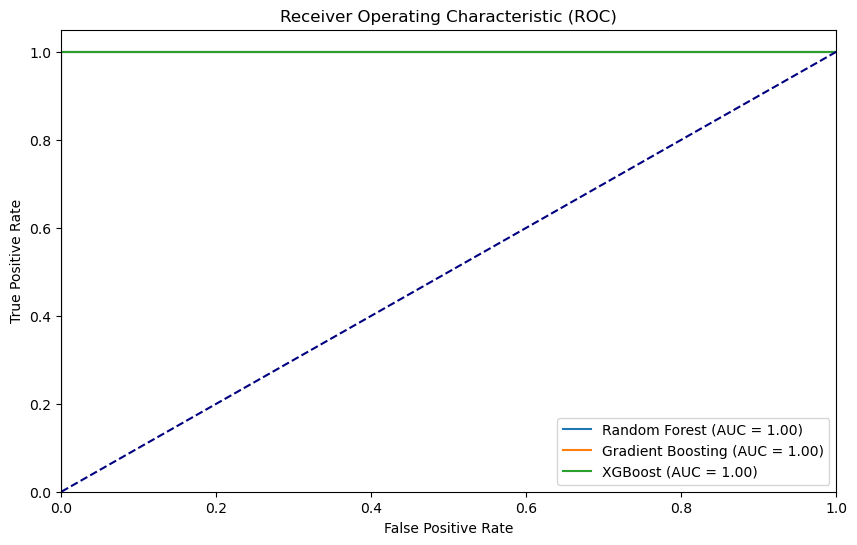

In [15]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % gb_roc_auc)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [24]:

rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

print(f"Random Forest ROC AUC: {rf_roc_auc}")
print(f"Gradient Boosting ROC AUC: {gb_roc_auc}")
print(f"XGBoost ROC AUC: {xgb_roc_auc}")


Random Forest ROC AUC: 1.0
Gradient Boosting ROC AUC: 1.0
XGBoost ROC AUC: 1.0


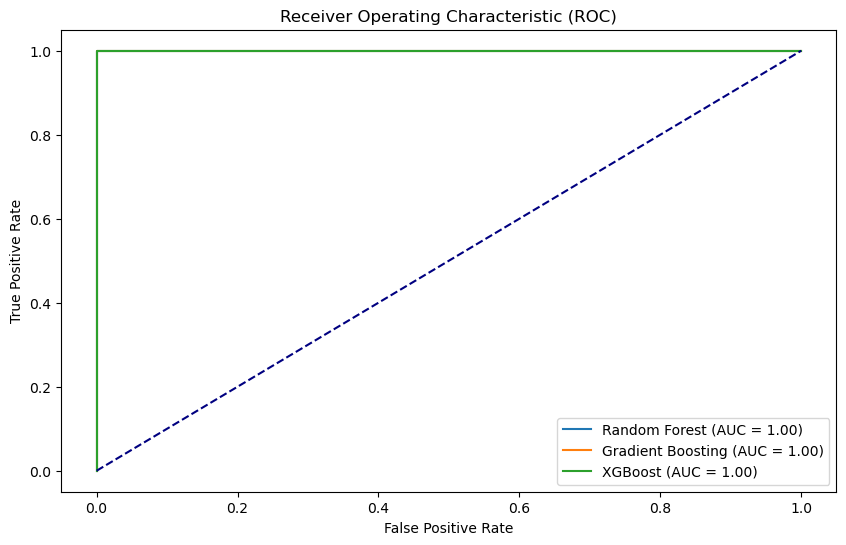

Flagged high-risk customers (sample):
   rf_high_risk  gb_high_risk  xgb_high_risk
0         False         False          False
1         False         False          False
2         False         False          False
3          True          True           True
4          True          True           True


In [25]:
# Plot ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % gb_roc_auc)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Outcome: A system that reduces default rates by flagging high-risk customers

# Define threshold for high-risk classification
threshold = 0.5
rf_high_risk = rf_model.predict_proba(X_test_scaled)[:, 1] > threshold
gb_high_risk = gb_model.predict_proba(X_test_scaled)[:, 1] > threshold
xgb_high_risk = xgb_model.predict_proba(X_test_scaled)[:, 1] > threshold

# Convert X_test back to DataFrame
df_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Add high-risk flags
df_test['rf_high_risk'] = rf_high_risk
df_test['gb_high_risk'] = gb_high_risk
df_test['xgb_high_risk'] = xgb_high_risk

# Show first few rows
print("Flagged high-risk customers (sample):")
print(df_test[['rf_high_risk', 'gb_high_risk', 'xgb_high_risk']].head())
